Predict whether a game of tennis will be played (Yes/No) based on weather conditions like Outlook, Temperature, Humidity, and Windy.

In [6]:
#import necessary libraries
import pandas as pd #for loading and handling dataset
import numpy as np
import matplotlib.pyplot as plt #for plotting graphs
from sklearn.preprocessing import LabelEncoder #converts categorical string values into numbers
from sklearn.tree import DecisionTreeClassifier, plot_tree #for building decision tree model #plot_tree: visualizing the decision tree
from sklearn.metrics import accuracy_score

In [13]:
#load the dataset
df=pd.read_csv('tennis.csv')
df.head() #display initial rows

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


Machine learning models in scikit-learn can’t handle strings directly.

LabelEncoder assigns an integer to each unique string in every column.

Example: 'Sunny' → 2, 'Rain' → 1, 'Overcast' → 0

So we'll convert the data to numeric values to make it ready for training

In [16]:
#encode categorical labels into numerical values
le=LabelEncoder()

#apply encoding to all columns
encoded_df = df.apply(le.fit_transform)

print("Encoded Dataset: ")
print(encoded_df)

Encoded Dataset: 
    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0


In [17]:
#split dataset into features(X) and target (y)
X=encoded_df.drop('play',axis=1)
y=encoded_df['play']

In [18]:
#train the decision tree classifier
clf=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

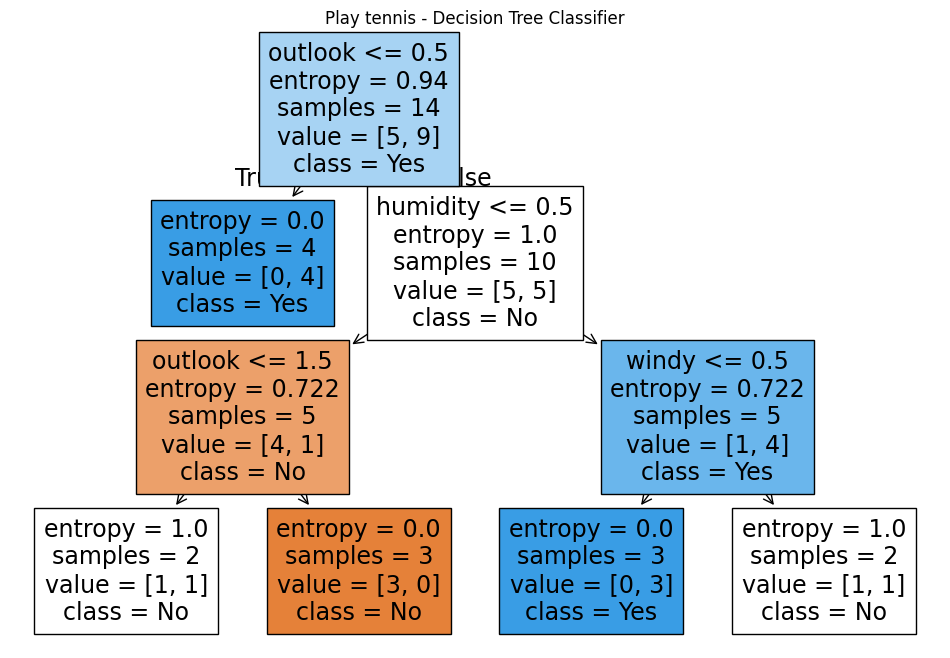

In [19]:
#visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Play tennis - Decision Tree Classifier')
plt.show()

In [20]:
#train-test-split and make predictions
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#split data: 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model on training set
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

#make predictions on test set
y_pred = clf.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

